# Exploratory Data Analysis Exercise with Pandas and Matplotlib

In this exercise, you are responsible for devleoping a data pipeline to ingest and analyze multi-state streamflow records from CSV files in our Canvas Class. This exercise will directly assist with HW #1. Filepath for the data:

    files -> Data -> NWIS_Streaflow -> <STATE>

You will download the data from Canvas and load it into a folder you create called "streamflow_data". Once within the repo, you will load the data into this python notebook and perform exploratory data analysis. After performing data cleaning and time-series alignment with Pandas, you will transition develop Matplotlib visualizations. The core of the assignment emphasizes the Matplotlib philosophy, challenging you to use powerful operators to link, overlay, and explore discharge trends across Idaho, Utah, and Wyoming.

The [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) provides interactive mapping to locate sites and repective metadata.

## Task 1: Select, download, and bring the data into your notebook session

Use the [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) to locate one site below a reservoir,  one site in a headwater catchment, and one site near a rivers terminus to the Great Salt Lake. Using this siteid, find the site data in the Canvas NWIS_Streamflow data folder, download it to your computer, then upload it to this repo into a folder named "streamflow_data". In the code block below, load the data into a Pandas DataFrame and inspect it as we previously did in the Pandas exercises (.head(), .describe()). Write down what you notice. Remove any outliers NaN values, and -999.

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
res_df = pd.read_csv("streamflow_data/10140100_1980_2020.csv")
res_df.head()

headwater_df = pd.read_csv("streamflow_data/10140700_1980_2020.csv")
headwater_df.head()

GSL_df = pd.read_csv("streamflow_data/10141000_1980_2020.csv")
GSL_df.head()

,Datetime,USGS_flow,variable,USGS_ID,measurement_unit,qualifiers,series
0,1986-10-01,982.4000,streamflow,10141000,ft3/s,"['A', '[91]']",0
1,1986-10-02,967.7083,streamflow,10141000,ft3/s,"['A', '[91]']",0
2,1986-10-03,976.8750,streamflow,10141000,ft3/s,"['A', '[91]']",0
3,1986-10-04,906.0000,streamflow,10141000,ft3/s,"['A', '[91]']",0
4,1986-10-05,858.8125,streamflow,10141000,ft3/s,"['A', '[91]']",0


In [43]:
# Convert datetime
res_df["Datetime"] = pd.to_datetime(res_df["Datetime"])
headwater_df["Datetime"] = pd.to_datetime(headwater_df["Datetime"])
GSL_df["Datetime"] = pd.to_datetime(GSL_df["Datetime"])

# Set index
res_df = res_df.set_index("Datetime")
headwater_df = headwater_df.set_index("Datetime")
GSL_df = GSL_df.set_index("Datetime")

# Keep only flow column
res_df = res_df[["USGS_flow"]]
headwater_df = headwater_df[["USGS_flow"]]
GSL_df = GSL_df[["USGS_flow"]]

# Rename column
res_df.columns = ["discharge_cfs"]
headwater_df.columns = ["discharge_cfs"]
GSL_df.columns = ["discharge_cfs"]

# Remove -999 and NaN
res_df = res_df.replace(-999, np.nan).dropna()
headwater_df = headwater_df.replace(-999, np.nan).dropna()
GSL_df = GSL_df.replace(-999, np.nan).dropna()

In [44]:
# Inspect
print(res_df.head())
print(res_df.describe())

print(headwater_df.head())
print(headwater_df.describe())

print(GSL_df.head())
print(GSL_df.describe())

            discharge_cfs
Datetime                 
1990-10-01      17.043478
1990-10-02      17.510416
1990-10-03      17.958334
1990-10-04      18.000000
1990-10-05      16.979166
       discharge_cfs
count   10349.000000
mean      107.399452
std       215.219657
min         3.397188
25%        10.654166
50%        19.883333
75%       103.750000
max      1550.833400
            discharge_cfs
Datetime                 
2012-04-11      26.940277
2012-04-12      50.850000
2012-04-13      59.413540
2012-04-14      43.793750
2012-04-15      48.347916
       discharge_cfs
count    3021.000000
mean      144.457276
std       249.777143
min        10.362708
25%        22.910418
50%        64.708336
75%       139.104170
max      1754.479100
            discharge_cfs
Datetime                 
1986-10-01       982.4000
1986-10-02       967.7083
1986-10-03       976.8750
1986-10-04       906.0000
1986-10-05       858.8125
       discharge_cfs
count   11489.000000
mean      328.125434
std       565

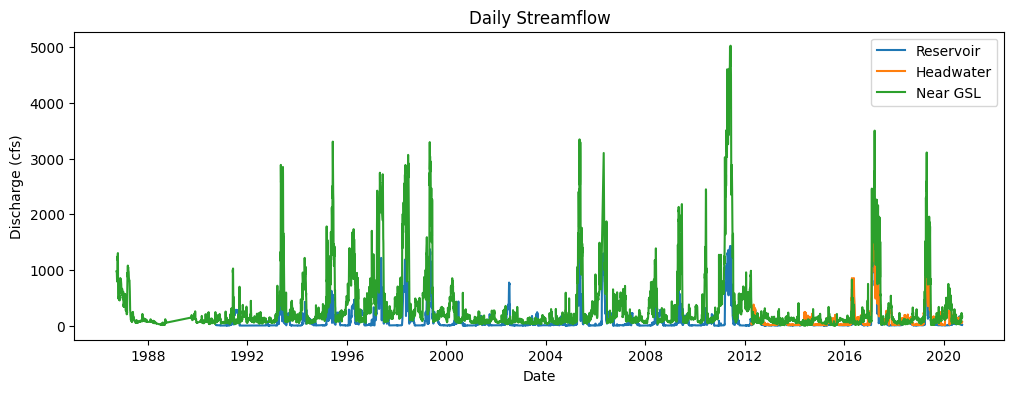

In [45]:
# Simple plot
plt.figure(figsize=(12,4))
plt.plot(res_df.index, res_df["discharge_cfs"], label="Reservoir")
plt.plot(headwater_df.index, headwater_df["discharge_cfs"], label="Headwater")
plt.plot(GSL_df.index, GSL_df["discharge_cfs"], label="Near GSL")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Discharge (cfs)")
plt.title("Daily Streamflow")
plt.show()

## Task 2: Slicing and Dicing

We are interested in examining the data from 2000-2010. Slice the data accordingly and save it to a new Pandas DataFrame.

## Task 3: Create plots for each DataFrame using the df.plot() function

Use the built in functionality of Pandas to plot the time series of each stream.

## Task 4: Join/Merge Pandas DataFrames

Create a single dataframe named All_Streams and combine all streamflow monitoring data into this dataframe. Hint, set your index to the date. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus). Print the dataframe.head() to demonstrate that is complete.

## Task 5: Demonstrate your Prowess with Matplotlib

Create a Four separate figures with all three stream on them:

* Figure 1 should be a single plot with all three stream  monitoring locations
* Figure 2 should be a single figure with subplots for each stream monitoring location. The subplots should be 2 rows and 2 columns
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 3 rows and 1 column 
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 1 row and 3 columns

Make sure your plots have the correct axes, labeled axes, a title, a legend. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus).